In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/body-fat-prediction-dataset/bodyfat.csv')
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Because percentage of body fat calculated by directly density: Percentage of Body Fat (i.e. 100*B) = 495/Density - 450.

I will drop 'Density' column.

In [57]:
data.drop('Density', axis=1, inplace=True)

Definitions of the column names:

* BodyFat: Percent body fat from Siri's (1956) equation
* Age: (years)
* Weight: (lbs)
* Height: (inches)
* Neck circumference: (cm)
* Chest circumference: (cm)
* Abdomen circumference: (cm)
* Hip circumference: (cm)
* Thigh circumference: (cm)
* Knee circumference: (cm)
* Ankle circumference: (cm)
* Biceps (extended) circumference: (cm)
* Forearm circumference: (cm)
* Wrist circumference: (cm)

In this kind of dataset, I would be nıcee to see genders of the persons, since we are looking the physical characteristics of the body and there are differences between fat distribution of man and woman body.

'Women, compared to men, have higher percent body fat and deposit it in a different pattern, with relatively more adipose tissue in the hips and thighs. For the same body mass index (BMI), women typically present with ~10% higher body fat compared to men. Aging increases adiposity in both sexes, but again, women are characterized by higher percent body fat throughout the entire life span.'

Karastergiou K, Smith SR, Greenberg AS, Fried SK. Sex differences in human adipose tissues - the biology of pear shape. Biol Sex Differ. 2012 May 31;3(1):13. doi: 10.1186/2042-6410-3-13. PMID: 22651247; PMCID: PMC3411490.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BodyFat,252.0,19.150794,8.368740,0.0,12.475,19.20,25.300,47.50
Age,252.0,44.884921,12.602040,22.0,35.750,43.00,54.000,81.00
Weight,252.0,178.924405,29.389160,118.5,159.000,176.50,197.000,363.15
Height,252.0,70.148810,3.662856,29.5,68.250,70.00,72.250,77.75
Neck,252.0,37.992063,2.430913,31.1,36.400,38.00,39.425,51.20
Chest,252.0,100.824206,8.430476,79.3,94.350,99.65,105.375,136.20
Abdomen,252.0,92.555952,10.783077,69.4,84.575,90.95,99.325,148.10
Hip,252.0,99.904762,7.164058,85.0,95.500,99.30,103.525,147.70
Thigh,252.0,59.405952,5.249952,47.2,56.000,59.00,62.350,87.30
Knee,252.0,38.590476,2.411805,33.0,36.975,38.50,39.925,49.10


I will drop the rows with body fat percentage below %5 because this is very unlikely or unhealthy.

In [60]:
data.loc[data['BodyFat']<=5]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
8,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
25,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
28,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
49,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
54,3.9,42,136.25,67.50,37.8,87.6,77.6,88.6,51.9,34.9,22.5,27.7,27.5,18.5
170,3.0,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
171,0.7,35,125.75,65.50,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,0.0,40,118.50,68.00,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [61]:
data.drop(data.loc[data['BodyFat']<=5].index, inplace=True)

In [62]:
data.shape

(244, 14)

I will drop this row also, because this values seems very weird:

In [63]:
data.loc[data['Height']==29.5]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
41,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [64]:
data.drop(data.loc[data['Height']==29.5].index, inplace=True)

In [65]:
data.shape

(243, 14)

In [66]:
data.duplicated().sum()

0

In [67]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(data[data.columns.drop('BodyFat')],
                                         data[['BodyFat']]),
                  columns=['MI Scores'],
                  index=data.columns.drop('BodyFat'))
corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat']),
                    columns=['Correlation'])
s_corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat'],
                                                                  method='spearman'),
                      columns=['Spearman_Correlation'])


relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
Abdomen,0.548346,0.797410,0.799409
Chest,0.317628,0.684971,0.653806
Hip,0.289200,0.595323,0.584389
Weight,0.263937,0.587088,0.590255
Thigh,0.251082,0.522959,0.514791
Knee,0.178375,0.462260,0.448000
Biceps,0.168619,0.471118,0.474158
Neck,0.104481,0.478344,0.480321
Age,0.079815,0.263868,0.244940
Wrist,0.076655,0.324746,0.294040


We can see the obvious correlations between the body fat percentage and physical characteristics of body parts. Among them, it seems height shows very weak relation.

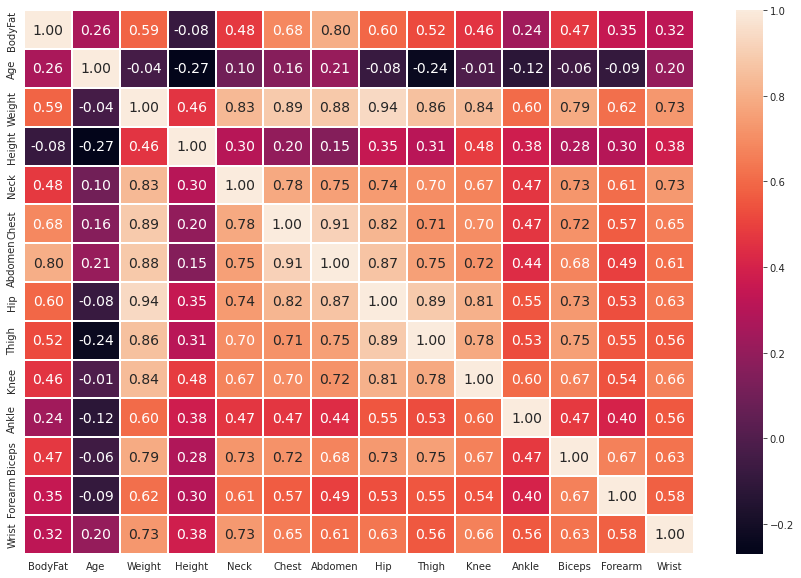

In [68]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":14}, fmt='.2f');

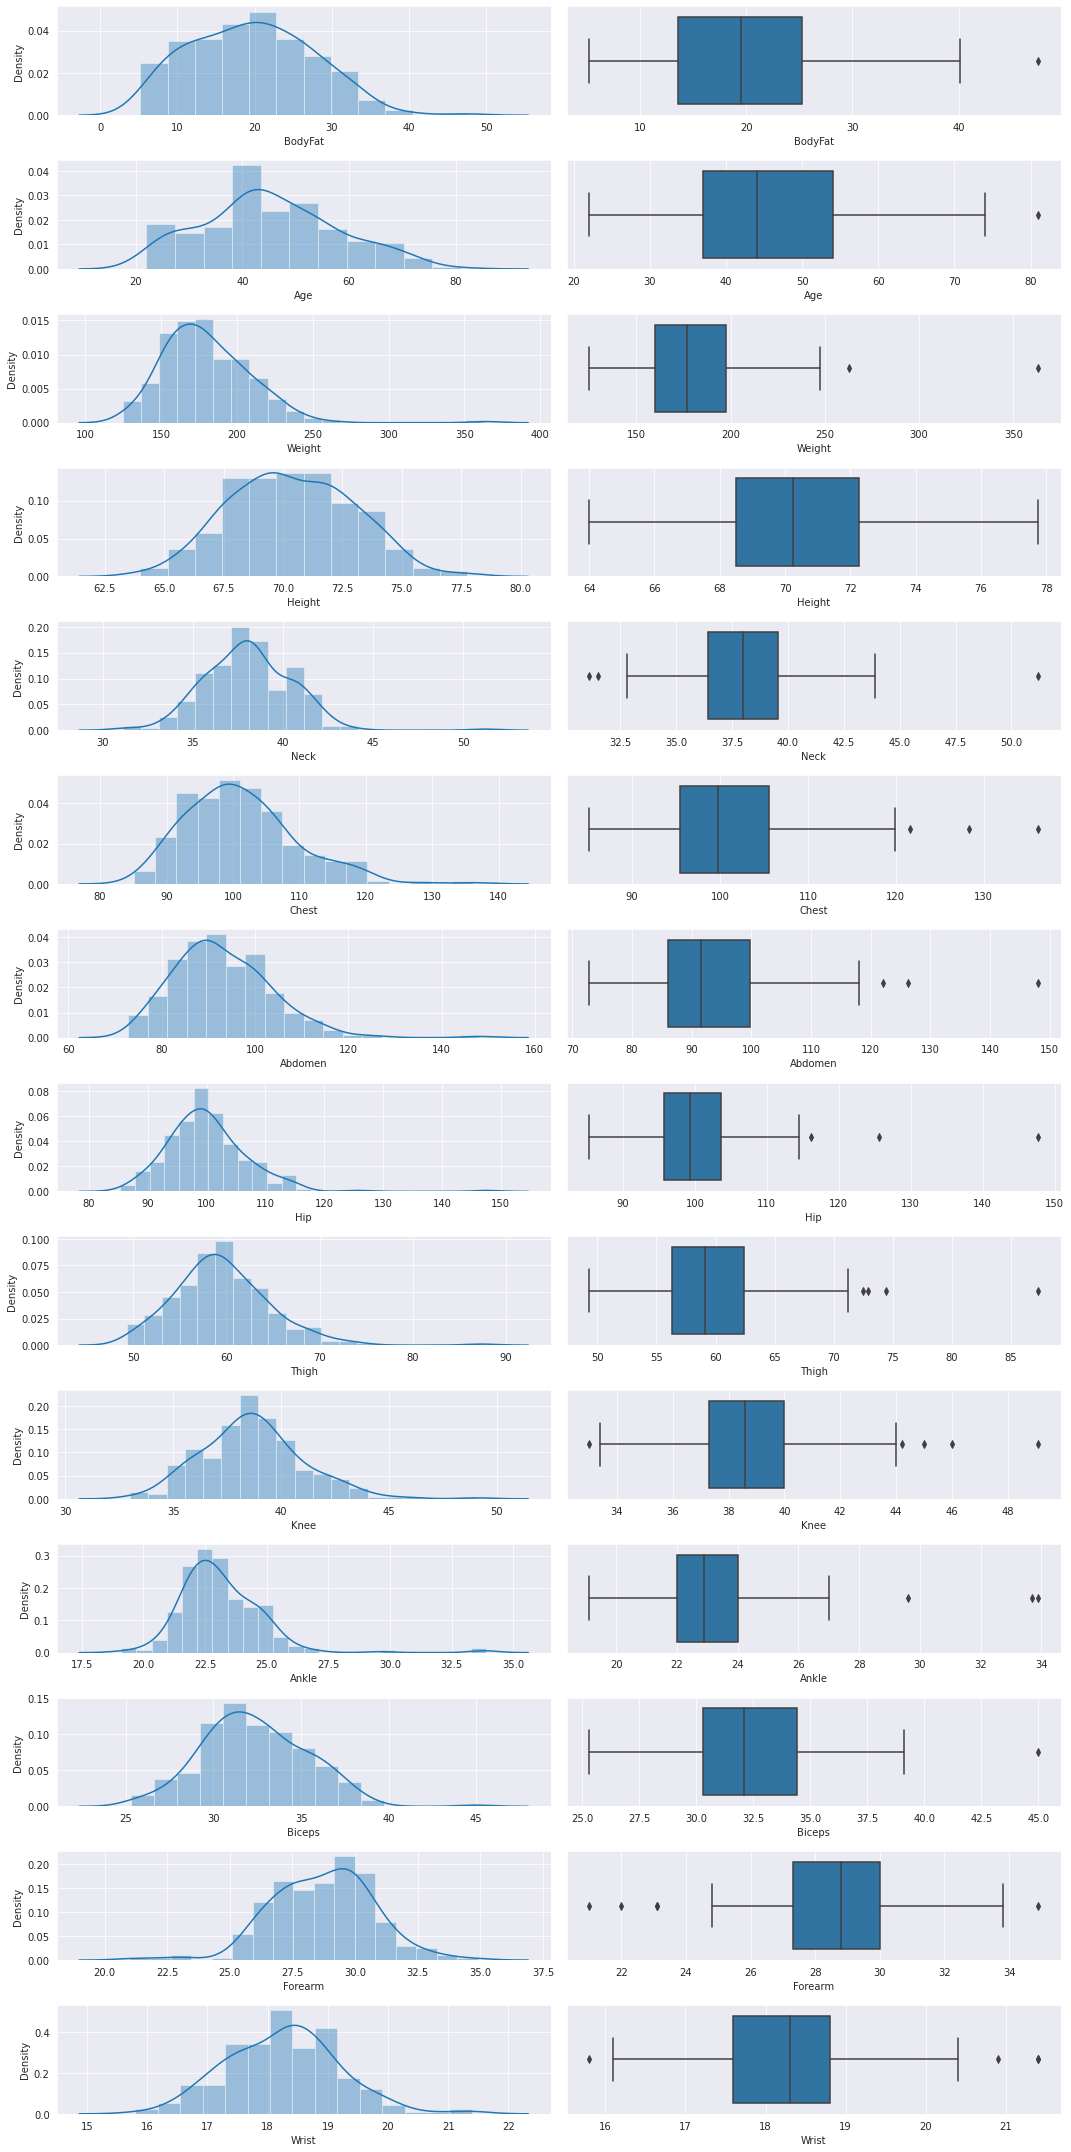

In [69]:
fig,ax = plt.subplots(14,2,figsize=(15,30))

for i, column in enumerate(data.columns):
    sns.distplot(data[column], ax=ax[i, 0])
    sns.boxplot(data[column], ax=ax[i, 1])

fig.tight_layout()

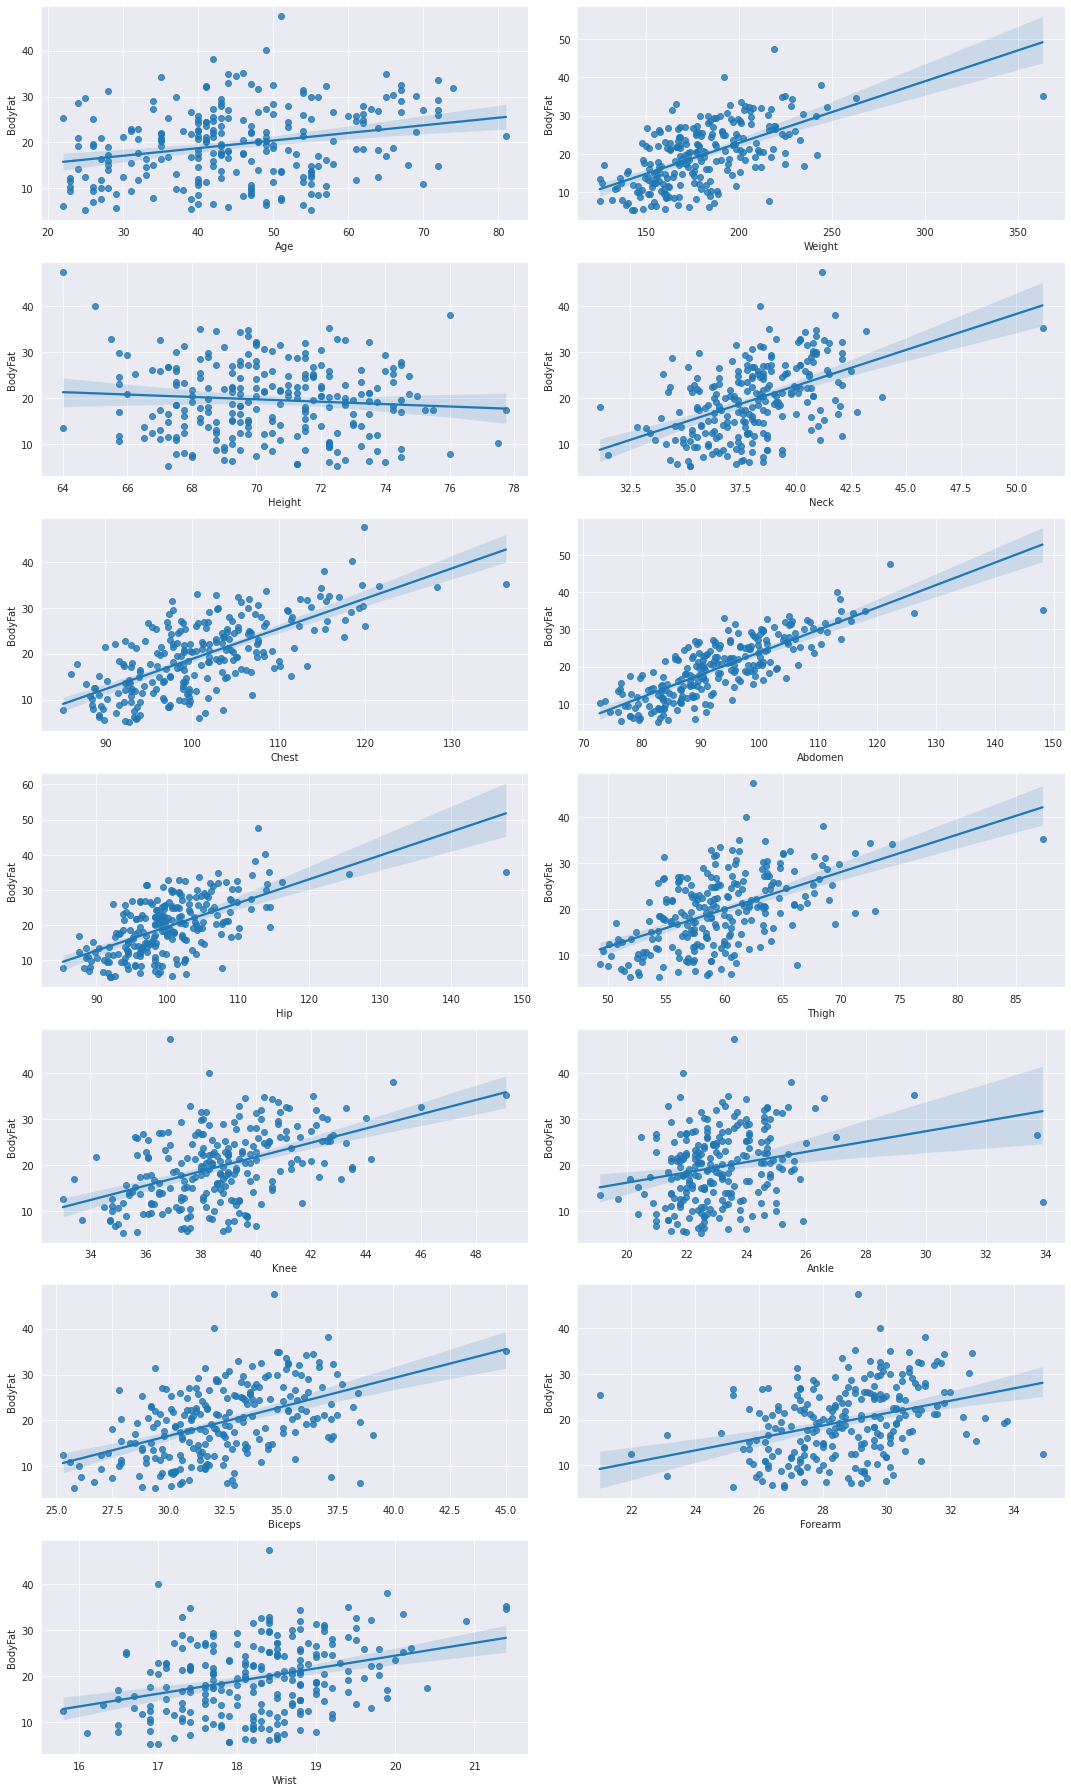

In [70]:
plt.figure(figsize=(15,25))

for i, column in enumerate(data.columns.drop('BodyFat')):
    plt.subplot(7, 2, i + 1)
    sns.regplot(data=data, x=column, y='BodyFat')
    
plt.tight_layout();

In [71]:
from sklearn.model_selection import train_test_split

X = data.drop('BodyFat', axis=1)
y = data[['BodyFat']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

Scaling is good idea for regression algorithms, especially when we are using gradient descent.

In [72]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(standard_scaler.transform(X_valid), columns=X_valid.columns)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
rfr = RandomForestRegressor()
sgdr = SGDRegressor(eta0=0.001)
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()

models = [lr, rfr, sgdr, gbr, xgbr, lgbmr]
model_name = ['Logistic Regression', 'Random Forest', 'Stochastic Gradient Descent',
              'Gradient Boosting', 'XGBoosting', 'LGBM']

mae_scores = []
mse_scores = []
rmse_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mae_scores.append(mae)
    mse = mean_squared_error(y_valid, y_pred)
    mse_scores.append(mse)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

In [74]:
models_scores = pd.DataFrame({'Model name':model_name, 'RMSE scores':rmse_scores, 'MSE scores':mse_scores,
                              'MAE scores':mae_scores})
models_scores.sort_values(by='RMSE scores').round(3)

,Model name,RMSE scores,MSE scores,MAE scores
1,Random Forest,4.617,21.321,3.751
0,Logistic Regression,4.620,21.347,3.945
5,LGBM,4.718,22.257,3.778
2,Stochastic Gradient Descent,4.721,22.285,3.881
3,Gradient Boosting,4.733,22.401,3.740
4,XGBoosting,4.849,23.513,4.037


In [75]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

mae_scores_val = []
mse_scores_val = []
rmse_scores_val = []
scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"]
cv = RepeatedKFold(n_splits=5, n_repeats=3)

for model in models:
    scores = cross_validate(lr, X_scaled, y, cv=cv, scoring=scoring)
    scores_df = -1 * pd.DataFrame(scores)
    mae_scores_val.append(scores_df['test_neg_mean_absolute_error'].mean())
    mse_scores_val.append(scores_df['test_neg_mean_squared_error'].mean())
    rmse_scores_val.append(scores_df['test_neg_root_mean_squared_error'].mean())
    
models_val = pd.DataFrame({'Model name':model_name, 'RMSE scores':rmse_scores_val,
                           'MSE scores':mse_scores_val, 'MAE scores':mae_scores_val})
models_val = models_val.sort_values(by='RMSE scores')
models_val.round(3)

,Model name,RMSE scores,MSE scores,MAE scores
2,Stochastic Gradient Descent,4.423,19.738,3.637
1,Random Forest,4.447,19.924,3.646
4,XGBoosting,4.454,20.061,3.642
0,Logistic Regression,4.477,20.276,3.667
5,LGBM,4.493,20.435,3.667
3,Gradient Boosting,4.521,20.498,3.684


It turns out Logistic Regression model works very well on our dataset. Thanks for reading.